In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [ ]:
data = pd.read_csv("housing.csv")


In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
Y = data['median_house_value']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
train_data = X_train.join(Y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8453,-118.35,33.91,25.0,1884.0,554.0,1337.0,549.0,2.8512,<1H OCEAN,272800.0
7015,-118.08,33.97,35.0,825.0,155.0,590.0,144.0,4.6333,<1H OCEAN,161200.0
19812,-118.94,36.32,10.0,2271.0,398.0,986.0,358.0,4.0703,INLAND,147100.0
215,-122.22,37.79,38.0,3049.0,711.0,2167.0,659.0,2.7969,NEAR BAY,141700.0
14398,-117.24,32.75,33.0,1980.0,614.0,1057.0,567.0,2.2042,NEAR OCEAN,231300.0
...,...,...,...,...,...,...,...,...,...,...
2636,-124.15,40.59,39.0,1186.0,238.0,539.0,212.0,2.0938,NEAR OCEAN,79600.0
6145,-117.97,34.09,27.0,3569.0,761.0,3339.0,762.0,4.1304,INLAND,160500.0
8013,-118.10,33.84,35.0,1790.0,269.0,924.0,263.0,5.2960,<1H OCEAN,226200.0
19645,-120.72,37.54,17.0,729.0,134.0,431.0,121.0,4.2188,INLAND,131300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

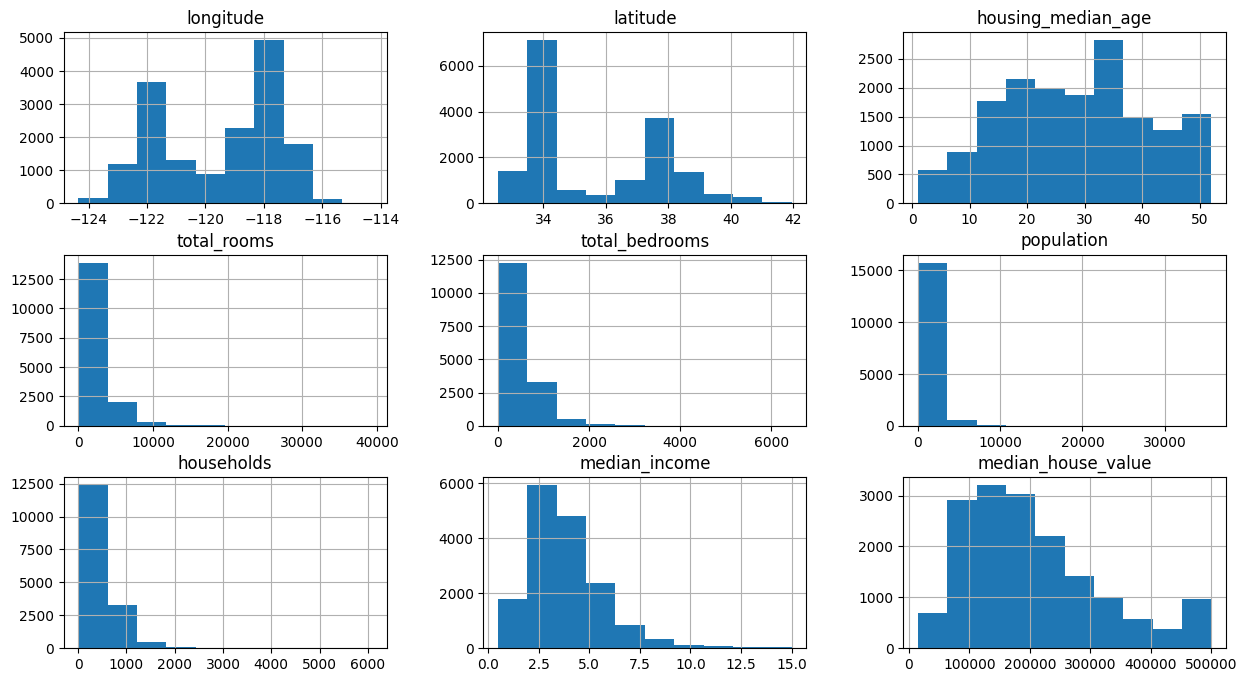

In [ ]:
train_data.hist(figsize = (15,8))

In [ ]:
train_data.corr()

<ipython-input-13-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924574,-0.103528,0.042037,0.065542,0.097133,0.052901,-0.015076,-0.045356
latitude,-0.924574,1.000000,0.009420,-0.033186,-0.063008,-0.106961,-0.068896,-0.079544,-0.144776
housing_median_age,-0.103528,0.009420,1.000000,-0.358009,-0.316795,-0.289092,-0.298562,-0.129957,0.098524
total_rooms,0.042037,-0.033186,-0.358009,1.000000,0.929158,0.853091,0.916764,0.199949,0.133659
total_bedrooms,0.065542,-0.063008,-0.316795,0.929158,1.000000,0.874315,0.979275,-0.007507,0.050717
population,0.097133,-0.106961,-0.289092,0.853091,0.874315,1.000000,0.904084,0.006904,-0.022645
households,0.052901,-0.068896,-0.298562,0.916764,0.979275,0.904084,1.000000,0.013857,0.066364
median_income,-0.015076,-0.079544,-0.129957,0.199949,-0.007507,0.006904,0.013857,1.000000,0.687558
median_house_value,-0.045356,-0.144776,0.098524,0.133659,0.050717,-0.022645,0.066364,0.687558,1.000000


<ipython-input-14-4dba2120d0aa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")


<Axes: >

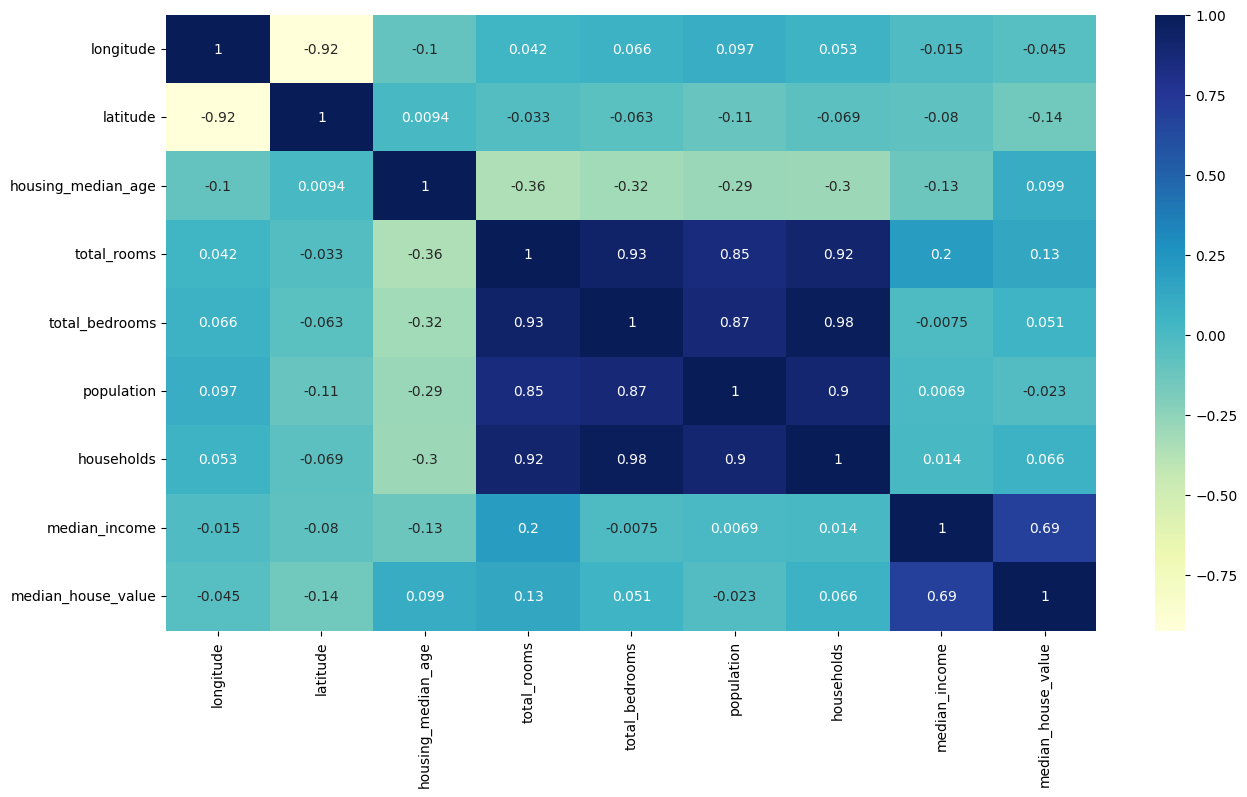

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

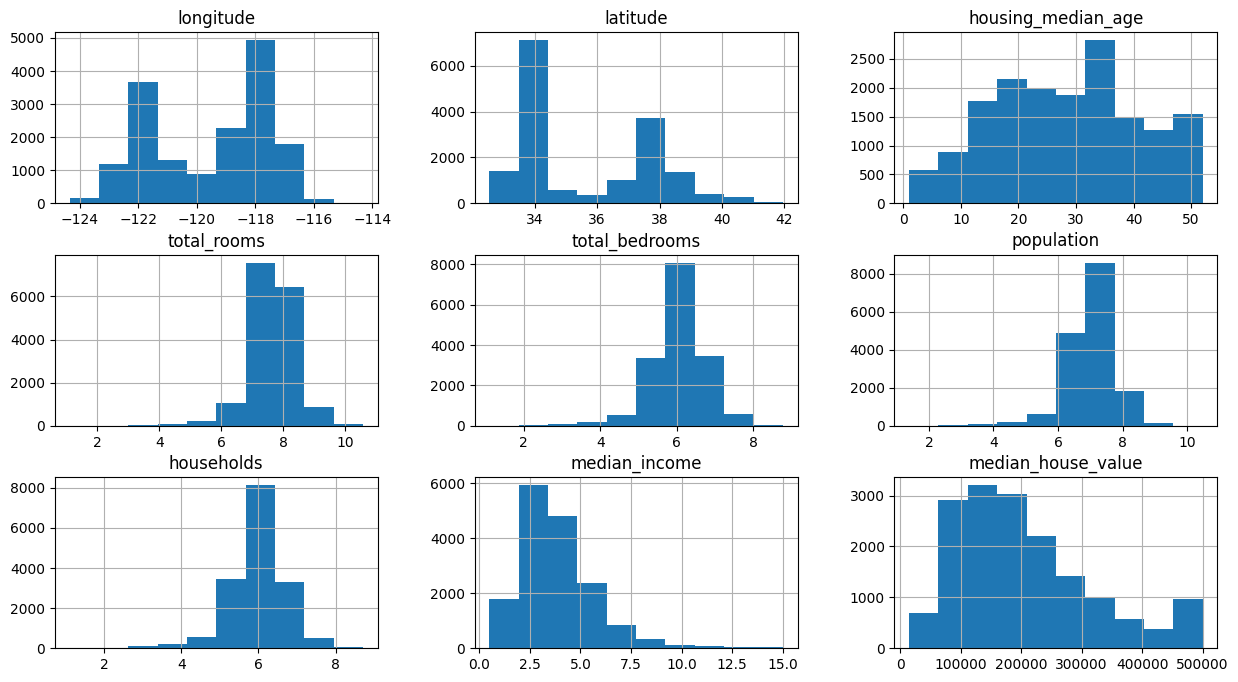

In [ ]:
train_data.hist(figsize = (15,8))

In [ ]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7179
INLAND        5236
NEAR OCEAN    2103
NEAR BAY      1825
ISLAND           3
Name: ocean_proximity, dtype: int64

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

<Axes: >

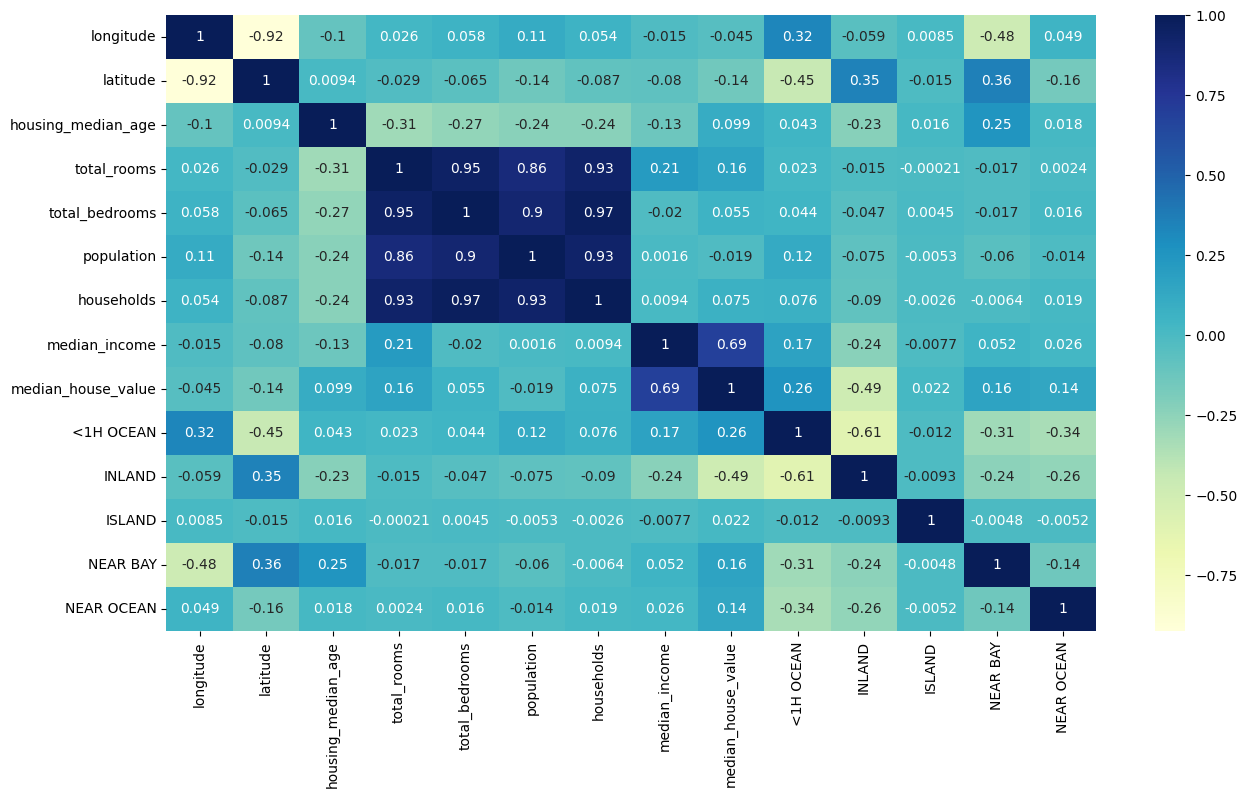

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

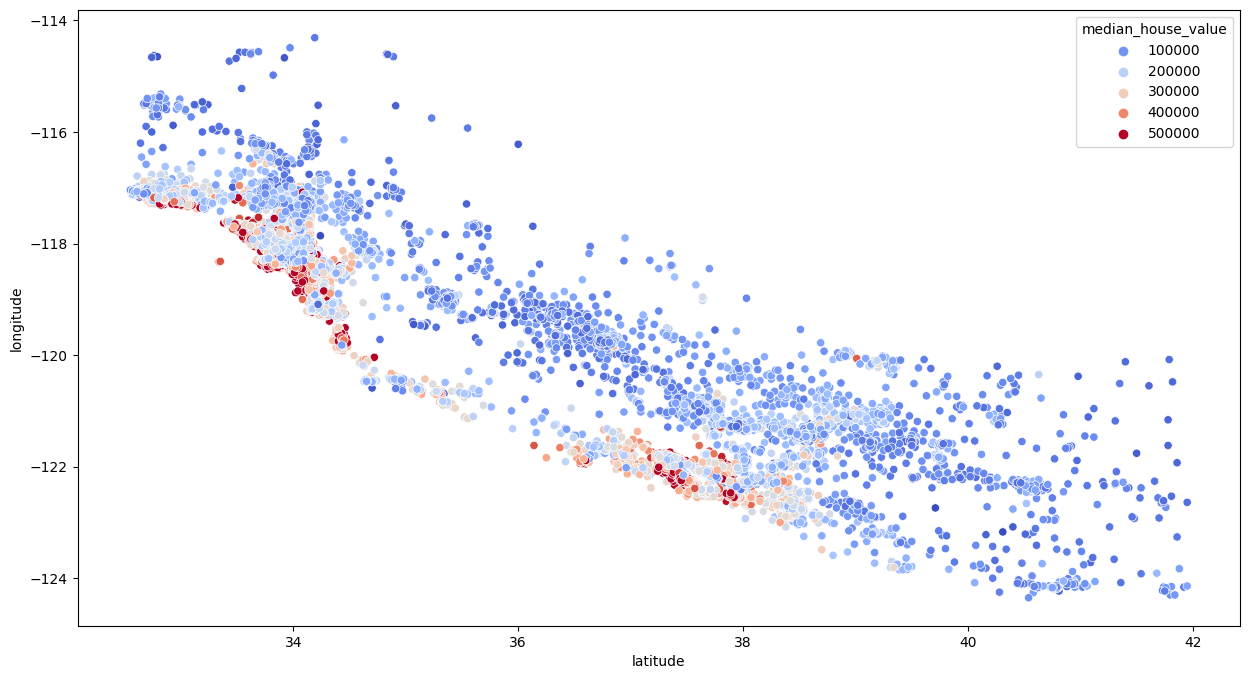

In [ ]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = "latitude", y = "longitude", data = train_data, hue = "median_house_value", palette = "coolwarm")

In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train,Y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, Y_train)

LinearRegression()

In [ ]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [ ]:
X_test,Y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [ ]:
X_test_s = scaler.transform(X_test)

In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
5746,-118.26,34.16,20.0,8.133881,6.786717,7.541152,6.769642,3.7321,351100.0,1,0,0,0,0,0.834376,1.201523
4061,-118.45,34.15,10.0,6.995766,5.564520,6.249975,5.587249,4.1727,332600.0,1,0,0,0,0,0.795413,1.252095
16505,-121.13,37.74,21.0,7.773594,6.165418,7.069874,6.091310,3.6016,134600.0,0,1,0,0,0,0.793123,1.276178
1827,-122.31,37.92,38.0,7.131699,5.468060,6.448889,5.634790,3.7240,220100.0,0,0,0,1,0,0.766726,1.265655
6932,-118.08,34.01,36.0,7.130099,5.777652,7.156956,5.789960,3.2031,147600.0,1,0,0,0,0,0.810319,1.231459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5368,-118.40,34.05,43.0,6.936343,4.983607,5.978886,5.010635,10.4519,500001.0,1,0,0,0,0,0.718478,1.384324
12244,-116.98,33.74,25.0,8.507749,6.968850,7.371489,6.932448,1.8446,85700.0,0,1,0,0,0,0.819118,1.227236
15016,-117.03,32.77,19.0,8.480529,7.308543,7.852828,7.198184,2.3393,118200.0,1,0,0,0,0,0.861803,1.178149
1550,-121.93,37.74,16.0,8.109826,6.040255,7.149132,5.998937,6.8806,343500.0,1,0,0,0,0,0.744807,1.351877


In [ ]:
reg.score(X_test_s, Y_test)

0.6683585427286564

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

forest.fit(X_train_s, Y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test_s, Y_test)

0.8132212350933722

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=200)

In [ ]:
grid_search.best_estimator_.score(X_test_s, Y_test)

0.8130102458276832

In [ ]:
#import the required libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

#reshape the data to 3D
X_train_s = X_train_s.reshape((X_train_s.shape[0], 1, X_train_s.shape[1]))
X_test_s = X_test_s.reshape((X_test_s.shape[0], 1, X_test_s.shape[1]))

# Create the model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_s.shape[1], X_train_s.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

#fit the model
model.fit(X_train_s, Y_train, epochs=30, batch_size=32, verbose=2)

#make predictions
predictions = model.predict(X_test_s)

#calculate the accuracy
accuracy = model.evaluate(X_test_s, Y_test)

#print the accuracy
print("Accuracy:", accuracy)

Epoch 1/30
511/511 - 3s - loss: 55979716608.0000 - 3s/epoch - 6ms/step
Epoch 2/30
511/511 - 1s - loss: 55970504704.0000 - 1s/epoch - 2ms/step
Epoch 3/30
511/511 - 1s - loss: 55960969216.0000 - 1s/epoch - 2ms/step
Epoch 4/30
511/511 - 1s - loss: 55951892480.0000 - 1s/epoch - 2ms/step
Epoch 5/30
511/511 - 1s - loss: 55943213056.0000 - 1s/epoch - 2ms/step
Epoch 6/30
511/511 - 1s - loss: 55935000576.0000 - 1s/epoch - 2ms/step
Epoch 7/30
511/511 - 2s - loss: 55927115776.0000 - 2s/epoch - 3ms/step
Epoch 8/30
511/511 - 1s - loss: 55919321088.0000 - 1s/epoch - 3ms/step
Epoch 9/30
511/511 - 1s - loss: 55911485440.0000 - 1s/epoch - 2ms/step
Epoch 10/30
511/511 - 1s - loss: 55903817728.0000 - 1s/epoch - 2ms/step
Epoch 11/30
511/511 - 1s - loss: 55896080384.0000 - 1s/epoch - 2ms/step
Epoch 12/30
511/511 - 1s - loss: 55887572992.0000 - 1s/epoch - 2ms/step
Epoch 13/30
511/511 - 1s - loss: 55879057408.0000 - 1s/epoch - 2ms/step
Epoch 14/30
511/511 - 1s - loss: 55870070784.0000 - 1s/epoch - 2ms/step
E

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
import statsmodels.formula.api as smf

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

In [ ]:
lassoreg=Lasso(alpha=0.001)
lassoreg.fit(X_train,Y_train)

print(sqrt(mean_squared_error(Y_test,lassoreg.predict(X_test))))
print('R2 Value/Coefficient of determination:{}'.format(lassoreg.score(X_test,Y_test)))

66500.15013970775
R2 Value/Coefficient of determination:0.6636218869475663


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.574e+13, tolerance: 2.185e+10
  model = cd_fast.enet_coordinate_descent(


In [ ]:
ridgereg=Ridge(alpha=0.0001)
ridgereg.fit(X_train,Y_train)

print(sqrt(mean_squared_error(Y_test,ridgereg.predict(X_test))))
print('R2 Value/Coefficient of determination:{}'.format(ridgereg.score(X_test,Y_test)))

66501.56570828945
R2 Value/Coefficient of determination:0.6636075660368492


In [ ]:
#import the required libraries
from xgboost import XGBRegressor

# Create the model
model = XGBRegressor()

# Fit the model
model.fit(X_train_s, Y_train)

#make predictions
predictions = model.predict(X_test_s)

#calculate the accuracy
accuracy = model.score(X_test_s, Y_test)

#print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.838547420553144


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 15.3 MB/s eta 0:00:00


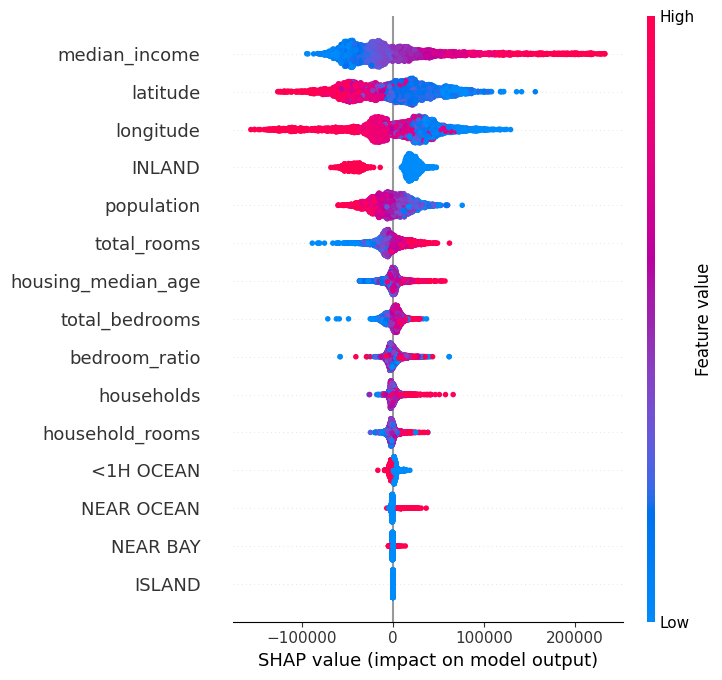

In [ ]:
shap.initjs()

#explaining the importance of the features
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_s)

#summary plot
shap.summary_plot(shap_values, X_test)